In [1]:
library(dplyr)
library(ggplot2)
library(ggbeeswarm)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
## genotype file
genos = read.table("/hps/nobackup/hipsci/scratch/genotypes/imputed/2017-03-27/Anna_selection_2020/neuroseq_Jan27.dosages.txt")
colnames(genos) = gsub("\\.","-",colnames(genos))
head(genos)

,HPSI0514i-sohd_2,HPSI0115i-zihe_1,HPSI1014i-eesb_1,HPSI0913i-eika_2,HPSI0114i-lexy_2,HPSI1014i-quls_2,HPSI0514i-yewo_4,HPSI0314i-bubh_3,HPSI0714i-burb_1,HPSI0314i-xugn_2,⋯,HPSI0413i-nudd_1,HPSI0513i-pedc_1,HPSI0513i-dulv_1,HPSI0813i-peoj_1,HPSI0413i-yotv_2,HPSI0513i-dipe_1,HPSI0613i-bawa_1,HPSI0813i-aizi_3,HPSI0613i-hikj_2,HPSI0513i-momt_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13_21085751_A_T,0.902,0.935,0.387,0,0.357,0.005,0.019,0.681,0.605,0.768,⋯,0.025,0.313,0.008,1.027,0.004,0.028,0.896,0.929,0.016,0.944
13_21088717_T_C,0.914,0.947,0.671,0,0.336,0.015,0.001,0.962,0.609,0.783,⋯,0.011,0.312,0.003,1.014,0.000,0.018,0.977,0.940,0.007,0.993
13_21131211_C_A,0.731,0.005,1.112,1,0.996,0.992,1.033,0.999,0.006,1.006,⋯,1.994,1.000,0.003,0.002,0.966,1.027,0.998,0.000,0.996,0.005
13_21151047_T_C,1.000,1.000,2.000,1,1.000,1.000,0.999,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.956,0.000,0.002,0.000,1.000,0.000
13_21200260_C_T,1.001,1.468,1.010,1,1.951,1.578,1.077,2.000,1.999,2.000,⋯,2.000,1.982,2.000,2.000,1.007,2.000,2.000,2.000,1.004,2.000
13_21258328_T_C,1.000,0.988,1.000,1,1.000,1.000,0.003,1.000,2.000,1.000,⋯,0.003,1.000,2.000,2.000,1.000,0.995,0.981,2.000,1.000,2.000


In [3]:
### annotation file (map genes IDs)
annos_file = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/annos/combined_feature_id_annos.tsv"
annos = read.csv(annos_file,sep="\t")
# head(annos,2)
annos$feature_id = annos$ensembl_gene_id
head(annos,2)

feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
ENSG00000000003,X,99883667,99894988,TSPAN6,ENSG00000000003_TSPAN6,ENSG00000000003
ENSG00000000419,20,49551404,49575092,DPM1,ENSG00000000419_DPM1,ENSG00000000419


In [4]:
#### full expressino files (grouped by celltype, pool, donor, treatment)
mydir = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/'
Astro = 'pool1_17_D52/pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.celltype.Astro.groupedby.donor_id-celltype-treatment.mean.tsv'
e_Astro = read.csv(paste0(mydir,Astro),sep="\t")

In [5]:
e = e_Astro
e_ROT = e[e$treatment == "ROT",]
rownames(e_ROT) = e_ROT$donor_id
e_noROT = e[e$treatment == "NONE",]
rownames(e_noROT) = e_noROT$donor_id

In [6]:
## Astro (ROT inter)
ROT_inter_Astro = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/treatment_D52/celltype_Astro/treatment_interaction_test_100cellfilter_top_qtl_results_all/top_qtl_results_all.txt"
int_Astro = read.csv(ROT_inter_Astro,sep="\t")
nrow(int_Astro)
int_Astro$q_value = p.adjust(int_Astro$p_value, "BH")
nrow(int_Astro[int_Astro$q_value < 0.05,])

[1] 3372

[1] 42

In [7]:
res = int_Astro
res[-log10(res$p_value)*sign(res$beta) > 6,c("snp_id","feature_id")]
res[-log10(res$p_value)*sign(res$beta) < -6,c("snp_id","feature_id")]

,snp_id,feature_id
,<fct>,<fct>
433,9_108454343_A_G,ENSG00000095209
1880,11_34905987_T_C,ENSG00000149089
3358,21_33725750_T_C,ENSG00000256073


,snp_id,feature_id
,<fct>,<fct>
845,12_6976296_C_T,ENSG00000111671
1464,13_52714837_C_A,ENSG00000136098
1947,13_44453480_C_T,ENSG00000151773
3139,12_56401085_G_A,ENSG00000197728


In [8]:
snps_positive = res[-log10(res$p_value)*sign(res$beta) > 5,"snp_id"]
snps_negative = res[-log10(res$p_value)*sign(res$beta) < -5,"snp_id"]

In [9]:
col_NONE = "darkgrey"
col_ROT = "firebrick"

[1] "DDX11"
[1] 0.02372528 0.01529587
[1] "TMEM38B"


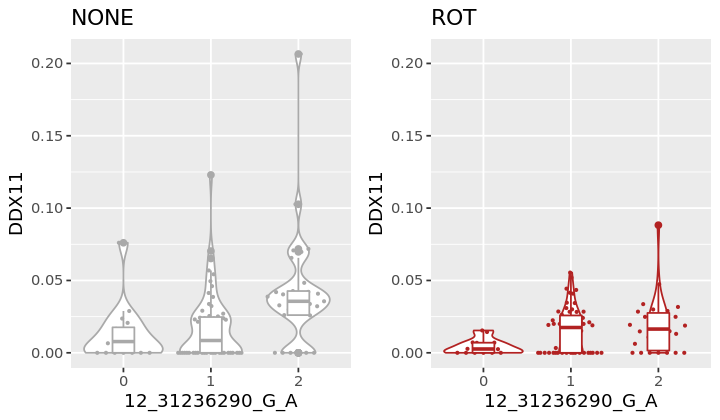

[1] 0.2003963 0.3292732
[1] "CCZ1B"


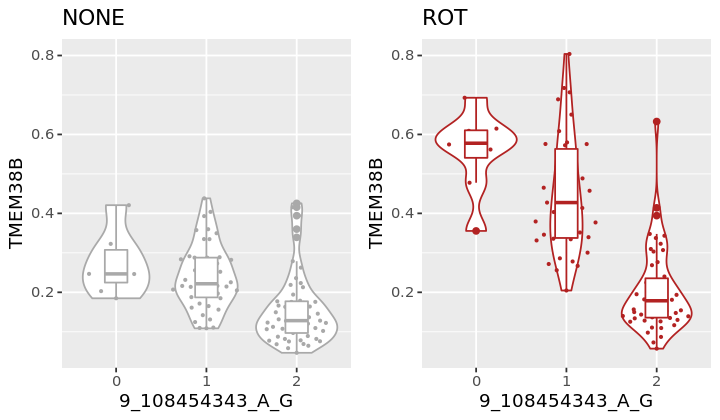

[1] 0.08740255 0.07431204
[1] "APIP"


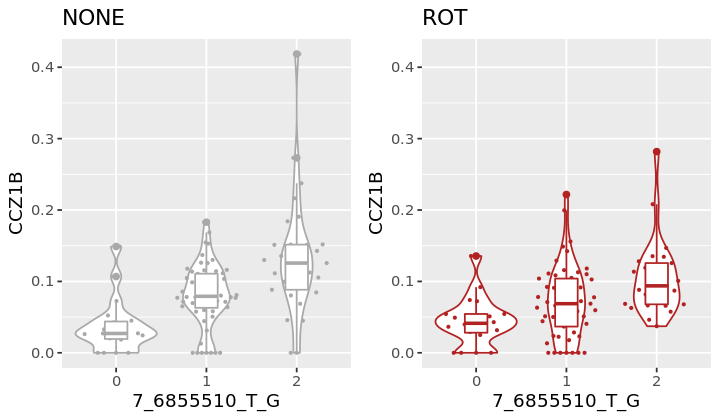

[1] 0.1681497 0.1849405
[1] "C21orf119"


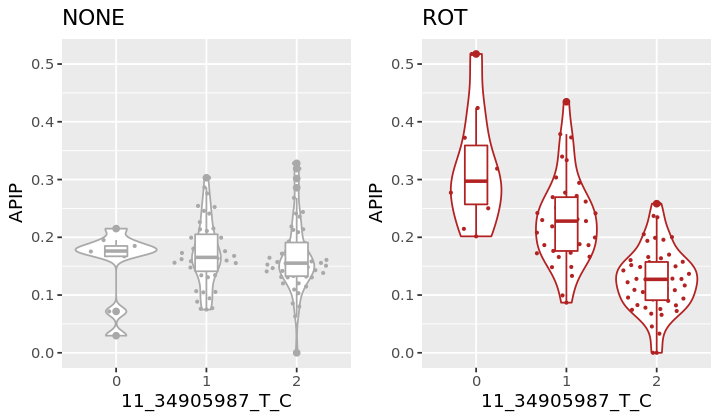

[1] 0.05283572 0.06211636


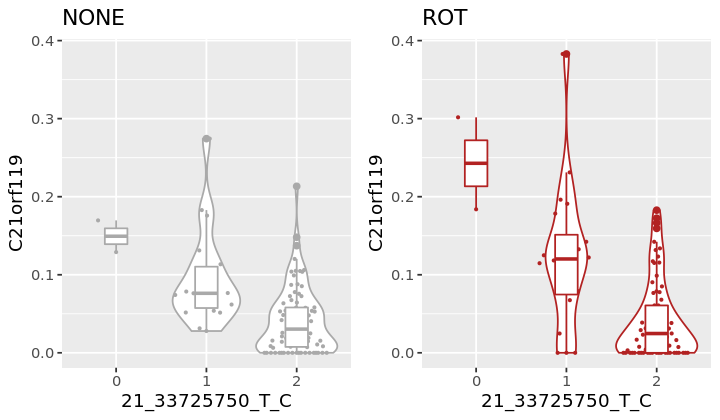

In [10]:
for (i in 1:length(snps_positive)){
#     print(i)
    snp = as.character(snps_positive[i])
#     print(snp)
    gene = as.character(res[res$snp_id == snp,"feature_id"])
#     print(gene)
    gene_name = as.character(annos[annos$feature_id == as.character(gene),"hgnc_symbol"])
    print(gene_name)
    g = data.frame(donor_id = colnames(genos), snp = t(genos[snp,]))
    g$donor_id = as.character(g$donor_id)
    colnames(g)[2] = "dosages"
#     print(head(g,2))
    e1 = e_noROT[,c("donor_id",gene_name)]
    e1$donor_id = as.character(e1$donor_id)
    df1 = inner_join(e1,g,by = "donor_id")
    colnames(df1)[2] = "gene"
    df1$genotypes <- round(df1$dosages)
#     print(head(df1,2))
    e2 = e_ROT[,c("donor_id",gene_name)]
    e2$donor_id = as.character(e2$donor_id)
    df2 = inner_join(e2,g,by = "donor_id")
    colnames(df2)[2] = "gene"
    df2$genotypes <- round(df2$dosages)
#     print(head(df2,2))   
    m = min(min(df1$gene),min(df1$gene))
    M = max(max(df1$gene),max(df2$gene))
    p1 = ggplot(df1, aes(x = as.factor(genotypes), y = gene)) +  geom_violin(col = col_NONE) + 
                xlab(snp) + ylab(gene_name) +  geom_quasirandom(size = 0.5, col = col_NONE) + 
                geom_boxplot(width = 0.25, col = col_NONE) + ylim(c(m,M)) + ggtitle("NONE")
    p2 = ggplot(df2, aes(x = as.factor(genotypes), y = gene))  + geom_violin(col = col_ROT) + 
                xlab(snp) + ylab(gene_name) + geom_quasirandom(size = 0.5, col = col_ROT) + 
                geom_boxplot(width = 0.25, col = col_ROT) + ylim(c(m,M)) +  ggtitle("ROT")
    options(repr.plot.width=6, repr.plot.height=3.5)
    print(cowplot::plot_grid(p1, p2, align = "h", ncol = 2))   
    print(c(mean(df1$gene),mean(df2$gene)))
}

[1] "ZFR2"
[1] 0.05448926 0.02123235
[1] "SPSB2"


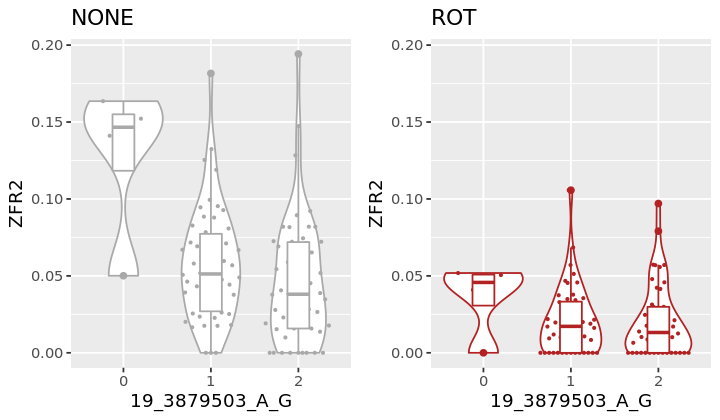

[1] 0.11123972 0.05651244
[1] "NEK3"


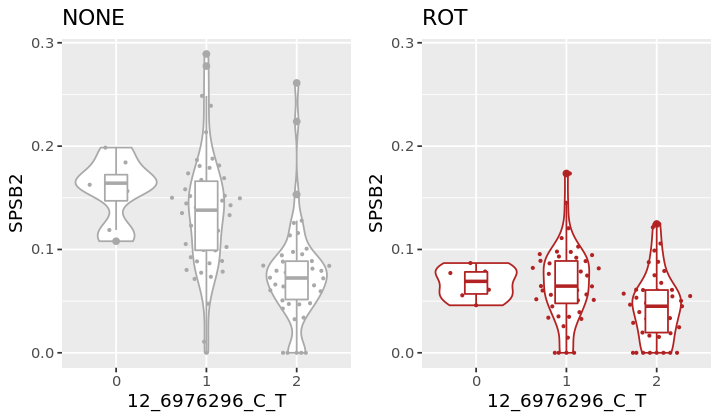

[1] 0.07692408 0.08803498
[1] "CCDC122"
[1] 0.06451440 0.02605469


Warning message in `==.default`(annos$feature_id, as.character(gene)):
“longer object length is not a multiple of shorter object length”Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”

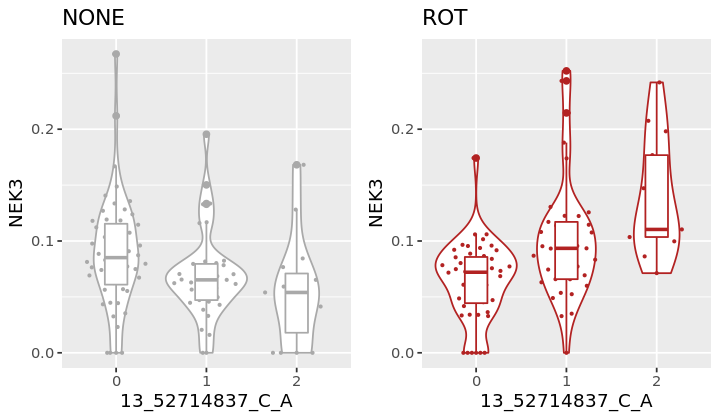

[1] "RPL41"


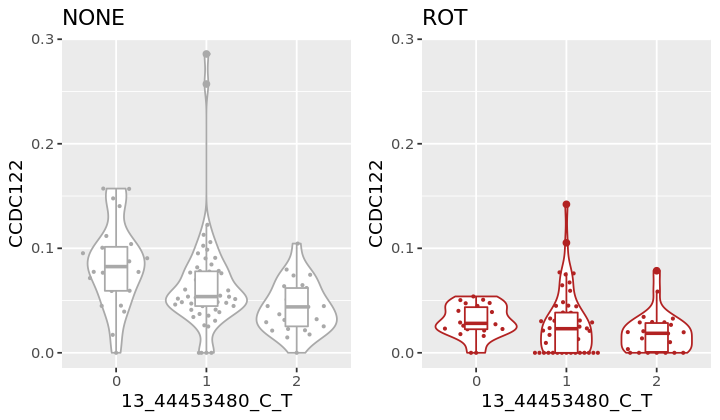

[1] 4.239108 4.251708


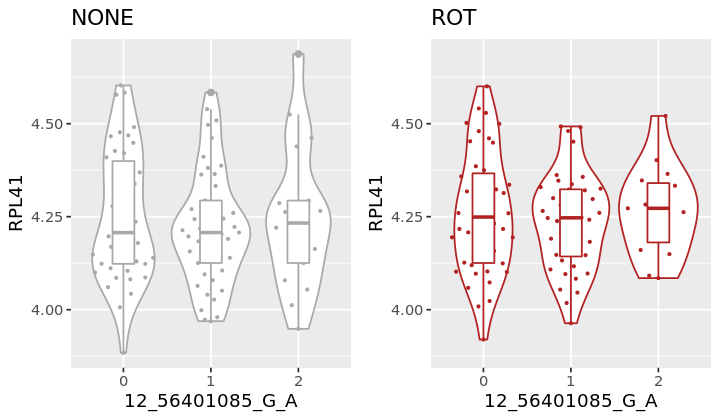

In [11]:
for (i in 1:length(snps_negative)){
#     print(i)
    snp = as.character(snps_negative[i])
#     print(snp)
    gene = as.character(res[res$snp_id == snp,"feature_id"])
#     print(gene)
    gene_name = as.character(annos[annos$feature_id == as.character(gene),"hgnc_symbol"])
    print(gene_name)
    g = data.frame(donor_id = colnames(genos), snp = t(genos[snp,]))
    g$donor_id = as.character(g$donor_id)
    colnames(g)[2] = "dosages"
#     print(head(g,2))
    e1 = e_noROT[,c("donor_id",gene_name)]
    e1$donor_id = as.character(e1$donor_id)
    df1 = inner_join(e1,g,by = "donor_id")
    colnames(df1)[2] = "gene"
    df1$genotypes <- round(df1$dosages)
#     print(head(df1,2))
    e2 = e_ROT[,c("donor_id",gene_name)]
    e2$donor_id = as.character(e2$donor_id)
    df2 = inner_join(e2,g,by = "donor_id")
    colnames(df2)[2] = "gene"
    df2$genotypes <- round(df2$dosages)
#     print(head(df2,2))   
    m = min(min(df1$gene),min(df1$gene))
    M = max(max(df1$gene),max(df2$gene))
    p1 = ggplot(df1, aes(x = as.factor(genotypes), y = gene)) +  geom_violin(col = col_NONE) + 
                xlab(snp) + ylab(gene_name) +  geom_quasirandom(size = 0.5, col = col_NONE) + 
                geom_boxplot(width = 0.25, col = col_NONE) + ylim(c(m,M)) + ggtitle("NONE")
    p2 = ggplot(df2, aes(x = as.factor(genotypes), y = gene))  + geom_violin(col = col_ROT) + 
                xlab(snp) + ylab(gene_name) + geom_quasirandom(size = 0.5, col = col_ROT) + 
                geom_boxplot(width = 0.25, col = col_ROT) + ylim(c(m,M)) +  ggtitle("ROT")
    options(repr.plot.width=6, repr.plot.height=3.5)
    print(cowplot::plot_grid(p1, p2, align = "h", ncol = 2))   
    print(c(mean(df1$gene),mean(df2$gene)))
}

In [ ]:
####### alternative visualisation

In [12]:
e = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery/celltype_Astro/treatment_interaction_test_ncellfilter_top_qtl_results_all/phenotypes.tsv"
cov = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery/celltype_Astro/treatment_interaction_test_ncellfilter_top_qtl_results_all/covariates.tsv"

In [13]:
e = read.csv(e,sep='\t')
cov = read.csv(cov,sep='\t')

In [14]:
head(e,2)
rownames(e) <- e$ensembl_gene_id
e$ensembl_gene_id <- c()
head(e,2)
head(cov,2)

ensembl_gene_id,HPSI0114i.eipl_1_NONE,HPSI0114i.eipl_1_ROT,HPSI0114i.kolf_2_NONE,HPSI0114i.kolf_2_ROT,HPSI0114i.zapk_2_NONE,HPSI0114i.zapk_2_ROT,HPSI0115i.bimq_4_NONE,HPSI0115i.bimq_4_ROT,HPSI0115i.hecn_6_NONE,⋯,HPSI0813i.vajx_2_NONE,HPSI1013i.garx_2_NONE,HPSI1013i.garx_2_ROT,HPSI1013i.hiaf_1_NONE,HPSI1013i.hiaf_1_ROT,HPSI1013i.sita_1_NONE,HPSI1013i.sita_1_ROT,HPSI1014i.boss_1_NONE,HPSI1014i.quls_2_NONE,HPSI1014i.quls_2_ROT
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000261657,0.22988459,0.18523051,0.21178845,0.24345052,0.13833782,0.17281969,0.25665447,0.22195554,0.15905954,⋯,0.16370946,0.13731541,0.15991284,0.19394177,0.18917683,0.23625903,0.20563766,0.2213603,0.21750516,0.18443218
ENSG00000227640,0.08719776,0.03678798,0.05529609,0.01998165,0.08079122,0.04385418,0.08127962,0.03561297,0.09112326,⋯,0.07136139,0.07348004,0.02030347,0.04970318,0.02683358,0.06873178,0.04897266,0.1790574,0.07771876,0.02689216


,HPSI0114i.eipl_1_NONE,HPSI0114i.eipl_1_ROT,HPSI0114i.kolf_2_NONE,HPSI0114i.kolf_2_ROT,HPSI0114i.zapk_2_NONE,HPSI0114i.zapk_2_ROT,HPSI0115i.bimq_4_NONE,HPSI0115i.bimq_4_ROT,HPSI0115i.hecn_6_NONE,HPSI0115i.hecn_6_ROT,⋯,HPSI0813i.vajx_2_NONE,HPSI1013i.garx_2_NONE,HPSI1013i.garx_2_ROT,HPSI1013i.hiaf_1_NONE,HPSI1013i.hiaf_1_ROT,HPSI1013i.sita_1_NONE,HPSI1013i.sita_1_ROT,HPSI1014i.boss_1_NONE,HPSI1014i.quls_2_NONE,HPSI1014i.quls_2_ROT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000261657,0.22988459,0.18523051,0.21178845,0.24345052,0.13833782,0.17281969,0.25665447,0.22195554,0.15905954,0.24008094,⋯,0.16370946,0.13731541,0.15991284,0.19394177,0.18917683,0.23625903,0.20563766,0.2213603,0.21750516,0.18443218
ENSG00000227640,0.08719776,0.03678798,0.05529609,0.01998165,0.08079122,0.04385418,0.08127962,0.03561297,0.09112326,0.03422115,⋯,0.07136139,0.07348004,0.02030347,0.04970318,0.02683358,0.06873178,0.04897266,0.1790574,0.07771876,0.02689216


index,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,treatment
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
HPSI0114i-eipl_1_NONE,-3.117356,2.261001,0.4572535,-3.543884,-0.7636538,-0.1302913,-0.2981434,2.491497,-0.4846010,0
HPSI0114i-eipl_1_ROT,-3.158403,1.978991,-0.8987557,-3.070758,0.4643913,-0.2302546,-0.6169807,2.082536,-0.8425721,1


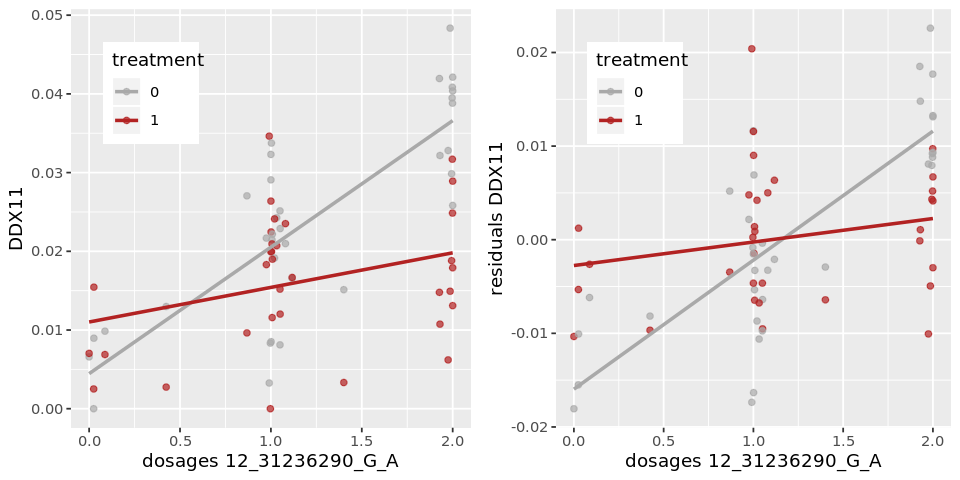

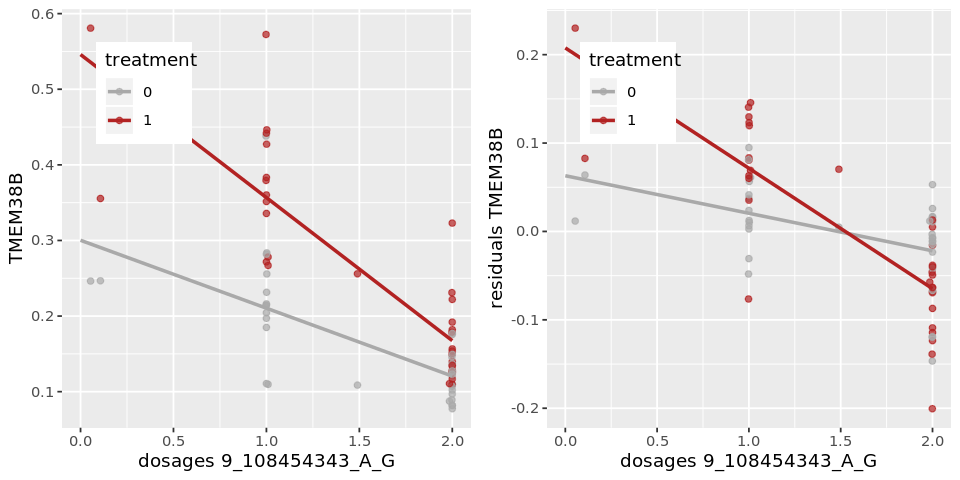

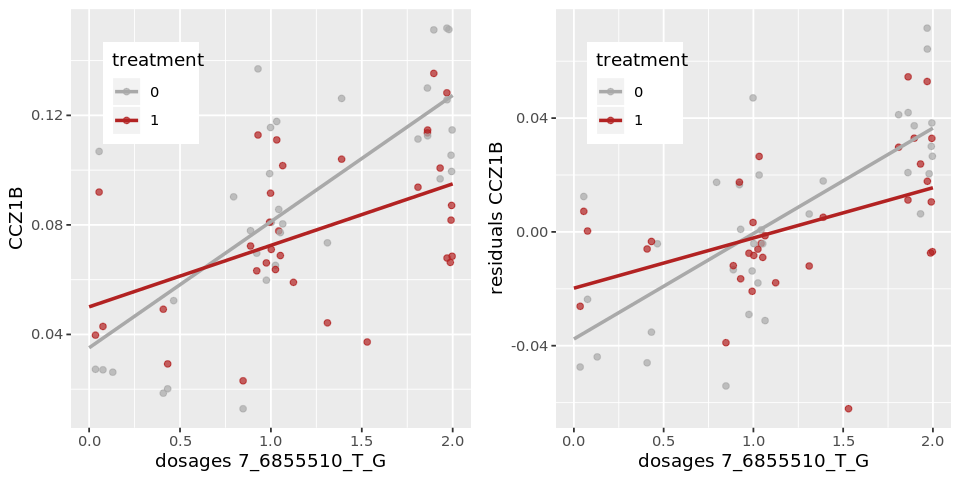

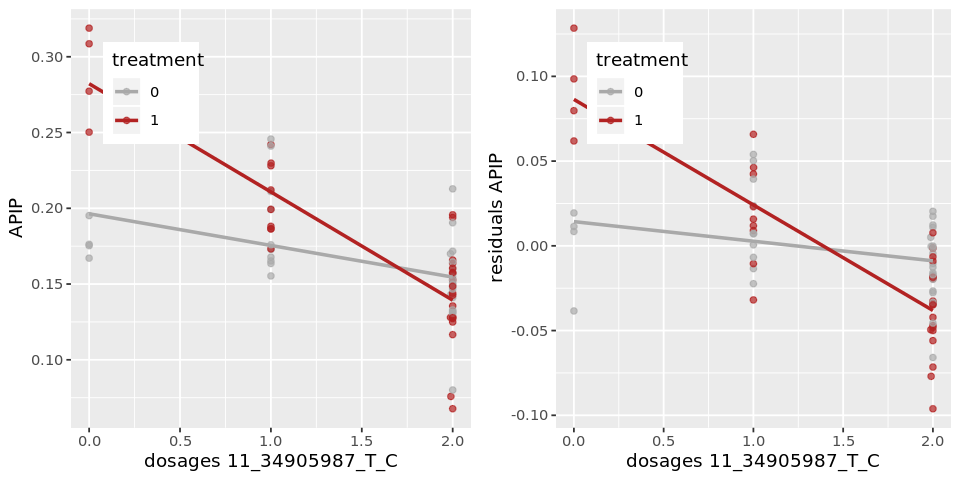

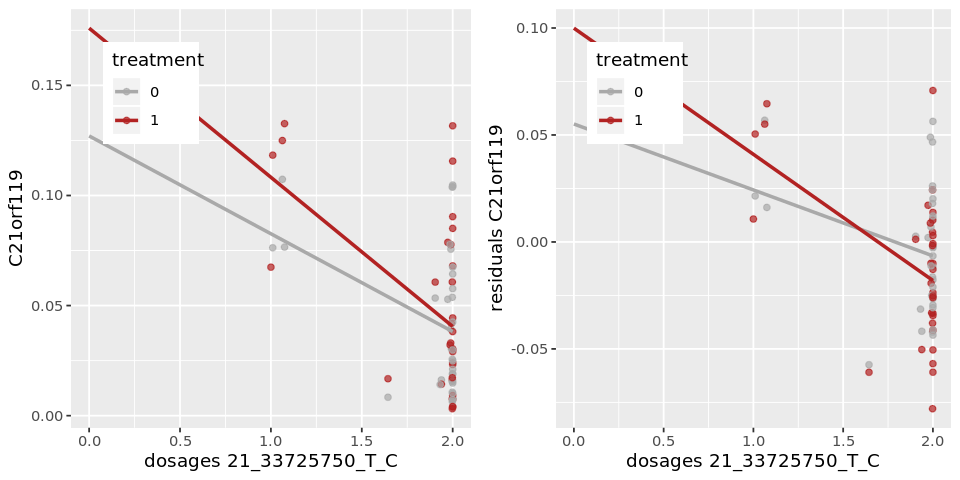

In [15]:
for (i in 1:length(snps_positive)){
#     print(i)
    snp = as.character(snps_positive[i])
#     print(snp)
    gene = as.character(res[res$snp_id == snp,"feature_id"])
    gene_name = as.character(annos[annos$feature_id == as.character(gene),"hgnc_symbol"])
    df_e = data.frame(gene = t(e[rownames(e) == gene,]), index = gsub("\\.","-",colnames(e)))
    colnames(df_e)[1] = "gene"
#     head(df_e)
    df_e2 = inner_join(df_e,as.data.frame(cov),by = "index")
#     head(df_e2,2)
    #### get residuals (more accurately what we test)
    mylm = lm(formula = gene ~ PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+treatment, data = df_e2)
    df_e2$res = mylm$residuals
    df_e2$donor_id = gsub("_NONE","",df_e2$index)
    df_e2$donor_id = gsub("_ROT","",df_e2$donor_id)
#     head(df_e2,2)
#     print(gene)

    g = data.frame(donor_id = colnames(genos), snp = t(genos[snp,]))
    g$donor_id = as.character(g$donor_id)
    colnames(g)[2] = "dosages"
#     print(head(g,2))
    df0 = inner_join(df_e2,g,by = "donor_id") 
    df0$genotypes <- round(df0$dosages)
    df0$treatment = as.factor(df0$treatment)
    p1 = ggplot(df0, aes(x = dosages, y = gene, col = treatment)) +  geom_point(alpha = 0.7) + 
        xlab(paste0("dosages ",snp)) + ylab(gene_name) + scale_color_manual(values=c(col_NONE, col_ROT)) +
        geom_smooth(method = lm,  se = FALSE, fullrange = TRUE) + theme(legend.position = c(0.2, 0.8)) + xlim(c(0,2))
    p2 = ggplot(df0, aes(x = dosages, y = res, col = treatment)) +  geom_point(alpha = 0.7) + xlim(c(0,2)) +
        xlab(paste0("dosages ",snp)) + ylab(paste0("residuals ",gene_name)) + scale_color_manual(values=c(col_NONE, col_ROT)) +
        geom_smooth(method = lm,  se = FALSE, fullrange = TRUE) + theme(legend.position = c(0.2, 0.8))
    
    options(repr.plot.width=8, repr.plot.height=4)
    print(cowplot::plot_grid(p1, p2, align = "h", ncol = 2))   
}

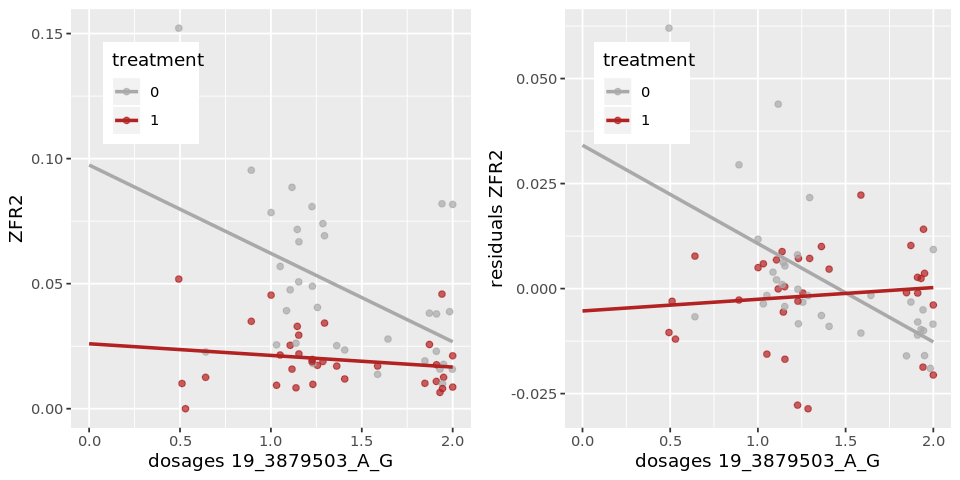

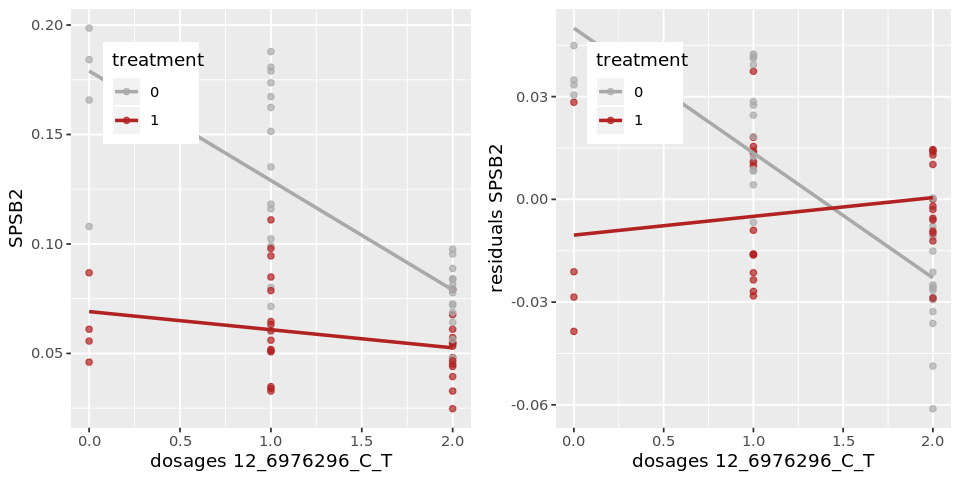

Warning message in `==.default`(annos$feature_id, as.character(gene)):
“longer object length is not a multiple of shorter object length”Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”Warning message in rownames(e) == gene:
“longer object length is not a multiple of shorter object length”

ERROR: `by` can't contain join column `index` which is missing from LHS

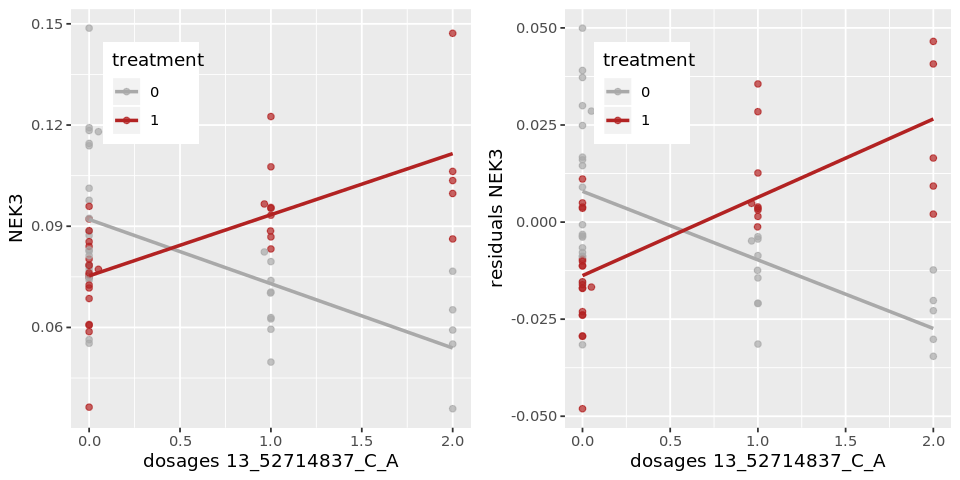

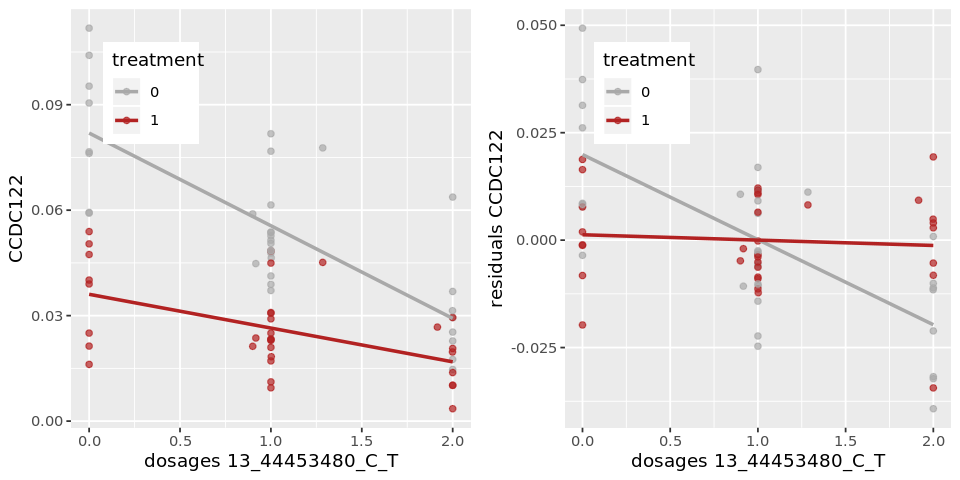

In [16]:
for (i in 1:length(snps_negative)){
#     print(i)
    snp = as.character(snps_negative[i])
#     print(snp)
    gene = as.character(res[res$snp_id == snp,"feature_id"])
    gene_name = as.character(annos[annos$feature_id == as.character(gene),"hgnc_symbol"])
    df_e = data.frame(gene = t(e[rownames(e) == gene,]), index = gsub("\\.","-",colnames(e)))
    colnames(df_e)[1] = "gene"
#     head(df_e)
    df_e2 = inner_join(df_e,as.data.frame(cov),by = "index")
#     head(df_e2,2)
    #### get residuals (more accurately what we test)
    mylm = lm(formula = gene ~ PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+treatment, data = df_e2)
    df_e2$res = mylm$residuals
    df_e2$donor_id = gsub("_NONE","",df_e2$index)
    df_e2$donor_id = gsub("_ROT","",df_e2$donor_id)
#     head(df_e2,2)
#     print(gene)

    g = data.frame(donor_id = colnames(genos), snp = t(genos[snp,]))
    g$donor_id = as.character(g$donor_id)
    colnames(g)[2] = "dosages"
#     print(head(g,2))
    df0 = inner_join(df_e2,g,by = "donor_id") 
    df0$genotypes <- round(df0$dosages)
    df0$treatment = as.factor(df0$treatment)
    p1 = ggplot(df0, aes(x = dosages, y = gene, col = treatment)) +  geom_point(alpha = 0.7) + 
        xlab(paste0("dosages ",snp)) + ylab(gene_name) + scale_color_manual(values=c(col_NONE, col_ROT)) +
        geom_smooth(method = lm,  se = FALSE, fullrange = TRUE) + theme(legend.position = c(0.2, 0.8)) + xlim(c(0,2))
    p2 = ggplot(df0, aes(x = dosages, y = res, col = treatment)) +  geom_point(alpha = 0.7) + xlim(c(0,2)) +
        xlab(paste0("dosages ",snp)) + ylab(paste0("residuals ",gene_name)) + scale_color_manual(values=c(col_NONE, col_ROT)) +
        geom_smooth(method = lm,  se = FALSE, fullrange = TRUE) + theme(legend.position = c(0.2, 0.8))
    
    options(repr.plot.width=8, repr.plot.height=4)
    print(cowplot::plot_grid(p1, p2, align = "h", ncol = 2))   
}